## SKY OBJECTS CLASSIFICATION

Importing appropriate libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict, GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import recall_score,precision_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

Reading data.csv by pandas

In [2]:
df=pd.read_csv(".../Skyserver_SQL2_27_2018 6_51_39 PM.csv")
df.head(10)


,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512
5,1.237650e+18,183.847174,0.173694,19.43133,18.46779,18.16451,18.01475,18.04155,752,301,4,269,3.649550e+17,STAR,0.000315,324,51666,594
6,1.237650e+18,183.864379,0.019201,19.38322,17.88995,17.10537,16.66393,16.36955,752,301,4,269,3.232870e+17,GALAXY,0.100242,287,52023,559
7,1.237650e+18,183.900081,0.187473,18.97993,17.84496,17.38022,17.20673,17.07071,752,301,4,269,3.722370e+18,STAR,0.000315,3306,54922,515
8,1.237650e+18,183.924588,0.097246,17.90616,16.97172,16.67541,16.53776,16.47596,752,301,4,270,3.638290e+17,STAR,0.000089,323,51615,595
9,1.237650e+18,183.973498,0.081626,18.67249,17.71375,17.49362,17.28284,17.22644,752,301,4,270,3.243690e+17,GALAXY,0.040508,288,52000,400


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [4]:
df.describe()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.237650e+18,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,301.0,3.648700,302.380100,1.645022e+18,0.143726,1460.986400,52943.533300,353.069400
std,0.000000e+00,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,0.0,1.666183,162.577763,2.013998e+18,0.388774,1788.778371,1511.150651,206.298149
min,1.237650e+18,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,301.0,1.000000,11.000000,2.995780e+17,-0.004136,266.000000,51578.000000,1.000000
25%,1.237650e+18,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,301.0,2.000000,184.000000,3.389248e+17,0.000081,301.000000,51900.000000,186.750000
50%,1.237650e+18,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,301.0,4.000000,299.000000,4.966580e+17,0.042591,441.000000,51997.000000,351.000000
75%,1.237650e+18,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,301.0,5.000000,414.000000,2.881300e+18,0.092579,2559.000000,54468.000000,510.000000
max,1.237650e+18,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,301.0,6.000000,768.000000,9.468830e+18,5.353854,8410.000000,57481.000000,1000.000000


It can be inferred that the column **objid** is not important feature due to its constant values in every rows.
Our labeled data is **calss** but it reported as `string` and first we have convert it to `int` values. For this aim, we can utilize `LabelEncoder()` from `sklearn`. 

In [5]:
label=LabelEncoder()
df['class_cat']=label.fit_transform(df['class'])
df.drop('class', axis=1, inplace=True)

In [6]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,redshift,plate,mjd,fiberid,class_cat
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,-0.000009,3306,54922,491,2
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,-0.000055,323,51615,541,2
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,0.123111,287,52023,513,0
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,-0.000111,3306,54922,510,2
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,0.000590,3306,54922,512,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,0.027583,447,51877,246,0
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,0.117772,447,51877,228,0
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,-0.000402,7303,57013,622,2
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,0.014019,447,51877,229,0


In [7]:
df['class_cat'].value_counts()

0    4998
2    4152
1     850
Name: class_cat, dtype: int64

In [8]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
redshift     0
plate        0
mjd          0
fiberid      0
class_cat    0
dtype: int64

There's no need to use `imputer` here, because there not exist any `NAN` or `NA`. 

/home/mohammadreza/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class_cat', ylabel='count'>

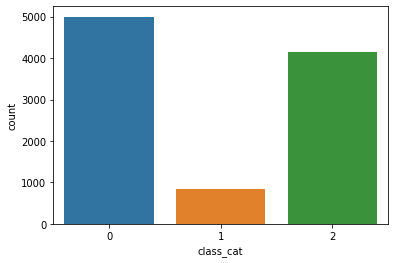

In [9]:
sns.countplot(df['class_cat'])

In [10]:
cor_mx=df.corr()
cor_mx['class_cat'].sort_values(ascending=False)

class_cat    1.000000
mjd          0.648768
plate        0.585495
specobjid    0.585493
z            0.215758
i            0.146791
fiberid      0.053593
r            0.049628
field        0.007713
camcol      -0.006186
ra          -0.043219
dec         -0.058918
redshift    -0.075510
run         -0.078162
g           -0.099212
u           -0.269044
objid             NaN
rerun             NaN
Name: class_cat, dtype: float64

In [42]:
cor_mx.drop(['objid', 'rerun'], axis=1, inplace=True)

Visualizing the correlation between data.

<AxesSubplot:>

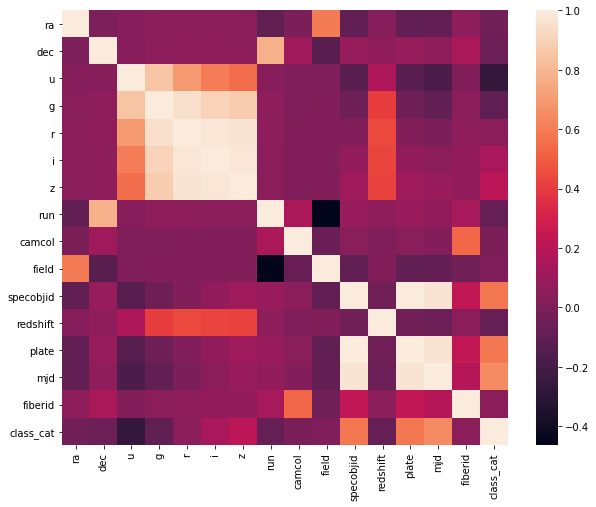

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(cor_mx)

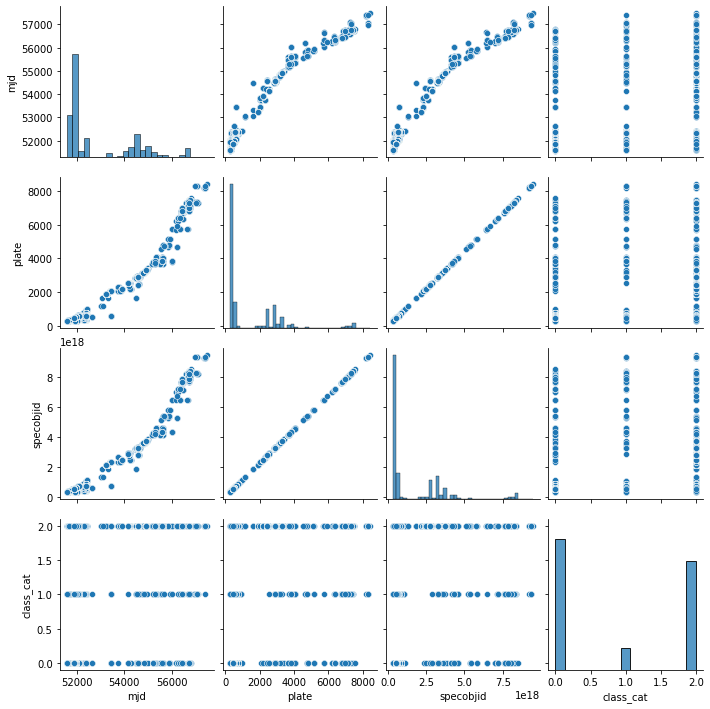

In [50]:
sns.pairplot(df[['mjd','plate','specobjid', 'class_cat']])

Let's drop some featuers that do not have much effect on the label. 

In [11]:
X=df.drop(['class_cat','rerun','objid','field'], axis=1, inplace=False)
y=df['class_cat'].copy()

In [12]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [14]:
y_test.shape, y_train.shape

((2000,), (8000,))

**Scaling data**. It is one the most important step in every machine learning project, specialy we you are going to utilize `SVM`. 

In [15]:
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
X_train_scaled

array([[ 0.24971341, -0.62305164,  0.06123837, ..., -0.65923109,
        -0.63705235, -1.31138647],
       [-0.16058441, -0.61220089, -0.33370941, ..., -0.66531098,
        -0.69617569, -0.81791365],
       [-0.5370447 , -0.56195014, -0.76295487, ...,  0.75738287,
         0.99081008,  0.11097635],
       ...,
       [ 1.26731145,  1.48529605,  0.79050718, ..., -0.47738716,
        -0.59829372, -0.24219537],
       [ 1.33751069, -0.59174934, -1.61584001, ..., -0.62938437,
        -0.83281628, -0.95337678],
       [-0.96520313,  1.3919277 ,  0.57470302, ...,  3.22194849,
         2.67910971,  0.4593101 ]])

In [16]:
result_tab=pd.DataFrame({
    'Model':[],
    'Accuracy':[],
    'Recall score':[],
    'Precision score':[],
    'F1 score':[],
})
result_tab.shape

(0, 5)

### Training several models
- K-nearest neighbor
- Logestic Regression (Softmax Regression)
- DecisionTree Classifier 
- ExtraTree Classifier
- RandomForest Classifier
- SGD Calssifier (OvO and OvR)
- LinearSVC (OvO and OvR)
- SVC Kernel (RBF)
- Softmax Regression (OvO)

In [17]:
#model training
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [18]:
knn_scores=cross_val_predict(knn, X_train_scaled, y_train, cv=10)
knn_accu=accuracy_score(y_train, knn_scores)
knn_recall=recall_score(y_train, knn_scores, average='weighted')
knn_precision=precision_score(y_train, knn_scores, average='weighted')
knn_f1=f1_score(y_train, knn_scores, average='weighted')

row=result_tab.shape[0]
result_tab.loc[row]=['K-Neighbors', knn_accu,knn_recall,knn_precision,knn_f1]
result_tab

,Model,Accuracy,Recall score,Precision score,F1 score
0,K-Neighbors,0.907375,0.907375,0.908972,0.907214


In [19]:
X_new=X_train.iloc[50]
np.argmax(knn.predict_proba([X_new]))

0

In [25]:
#softmax
log_reg=LogisticRegression(multi_class='multinomial')
log_reg.fit(X_train_scaled, y_train)

/home/mohammadreza/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial')

In [26]:
log_reg_scores=cross_val_predict(log_reg, X_train_scaled, y_train, cv=10)
log_reg_accu=accuracy_score(y_train, log_reg_scores)
log_reg_recall=recall_score(y_train, log_reg_scores, average='weighted')
log_reg_precision=precision_score(y_train, log_reg_scores, average='weighted')
log_reg_f1=f1_score(y_train, log_reg_scores, average='weighted')

row=result_tab.shape[0]
result_tab.loc[row]=['Softmax', log_reg_accu,log_reg_recall,log_reg_precision,log_reg_f1]
result_tab

/home/mohammadreza/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mohammadreza/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

,Model,Accuracy,Recall score,Precision score,F1 score
0,K-Neighbors,0.907375,0.907375,0.908972,0.907214
1,Softmax,0.976250,0.976250,0.976354,0.976197


In [27]:
tree=DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [28]:
tree_scores=cross_val_predict(tree, X_train_scaled, y_train, cv=10)
tree_accu=accuracy_score(y_train,tree_scores)
tree_recall=recall_score(y_train, tree_scores, average='weighted')
tree_precision=precision_score(y_train, tree_scores, average='weighted')
tree_f1=f1_score(y_train, tree_scores, average='weighted')

row=result_tab.shape[0]
result_tab.loc[row]=['DecisionTree', tree_accu,tree_recall,tree_precision,tree_f1]
result_tab

,Model,Accuracy,Recall score,Precision score,F1 score
0,K-Neighbors,0.907375,0.907375,0.908972,0.907214
1,Softmax,0.976250,0.976250,0.976354,0.976197
2,DecisionTree,0.985375,0.985375,0.985422,0.985397


In [29]:
extree=ExtraTreesClassifier()
extree.fit(X_train_scaled,y_train)

ExtraTreesClassifier()

In [30]:
extree_scores=cross_val_predict(extree, X_train_scaled, y_train, cv=10)
extree_accu=accuracy_score(y_train,extree_scores)
extree_recall=recall_score(y_train, extree_scores, average='weighted')
extree_precision=precision_score(y_train, extree_scores, average='weighted')
extree_f1=f1_score(y_train, extree_scores, average='weighted')

row=result_tab.shape[0]
result_tab.loc[row]=['ExtraTree', extree_accu,extree_recall,extree_precision,extree_f1]
result_tab

,Model,Accuracy,Recall score,Precision score,F1 score
0,K-Neighbors,0.907375,0.907375,0.908972,0.907214
1,Softmax,0.976250,0.976250,0.976354,0.976197
2,DecisionTree,0.985375,0.985375,0.985422,0.985397
3,ExtraTree,0.980500,0.980500,0.980453,0.980430


In [31]:
forest=RandomForestClassifier()
forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [32]:
forest_scores=cross_val_predict(forest, X_train_scaled, y_train, cv=10)
forest_accu=accuracy_score(y_train,forest_scores)
forest_recall=recall_score(y_train, forest_scores, average='weighted')
forest_precision=precision_score(y_train, forest_scores, average='weighted')
forest_f1=f1_score(y_train, forest_scores, average='weighted')

row=result_tab.shape[0]
result_tab.loc[row]=['RandomForest', forest_accu,forest_recall,forest_precision,forest_f1]
result_tab

,Model,Accuracy,Recall score,Precision score,F1 score
0,K-Neighbors,0.907375,0.907375,0.908972,0.907214
1,Softmax,0.976250,0.976250,0.976354,0.976197
2,DecisionTree,0.985375,0.985375,0.985422,0.985397
3,ExtraTree,0.980500,0.980500,0.980453,0.980430
4,RandomForest,0.988000,0.988000,0.987916,0.987934


In [33]:
sgd=SGDClassifier()
sgd.fit(X_train_scaled, y_train)

SGDClassifier()

In [37]:
sgd_scores=cross_val_predict(sgd, X_train_scaled, y_train, cv=10)
sgd_accu=accuracy_score(y_train,sgd_scores)
sgd_recall=recall_score(y_train, sgd_scores, average='weighted')
sgd_precision=precision_score(y_train, sgd_scores, average='weighted')
sgd_f1=f1_score(y_train, sgd_scores, average='weighted')

row=result_tab.shape[0]
result_tab.loc[row]=['SGDClassifier', sgd_accu,sgd_recall,sgd_precision,sgd_f1]
result_tab

,Model,Accuracy,Recall score,Precision score,F1 score
0,K-Neighbors,0.907375,0.907375,0.908972,0.907214
1,Softmax,0.976250,0.976250,0.976354,0.976197
2,DecisionTree,0.985375,0.985375,0.985422,0.985397
3,ExtraTree,0.980500,0.980500,0.980453,0.980430
4,RandomForest,0.988000,0.988000,0.987916,0.987934
5,SGDClassifier,0.969875,0.969875,0.969859,0.969778


In [39]:
from sklearn.multiclass import OneVsOneClassifier
ovo_sgd=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_sgd.fit(X_train_scaled, y_train)

OneVsOneClassifier(estimator=SGDClassifier(random_state=42))

In [40]:
ovo_sgd_scores=cross_val_predict(ovo_sgd, X_train_scaled, y_train, cv=10)
ovo_sgd_accu=accuracy_score(y_train,ovo_sgd_scores)
ovo_sgd_recall=recall_score(y_train, ovo_sgd_scores, average='weighted')
ovo_sgd_precision=precision_score(y_train, ovo_sgd_scores, average='weighted')
ovo_sgd_f1=f1_score(y_train, ovo_sgd_scores, average='weighted')

row=result_tab.shape[0]
result_tab.loc[row]=['OvO SGDClassifier', ovo_sgd_accu,ovo_sgd_recall,ovo_sgd_precision,ovo_sgd_f1]
result_tab

,Model,Accuracy,Recall score,Precision score,F1 score
0,K-Neighbors,0.907375,0.907375,0.908972,0.907214
1,Softmax,0.976250,0.976250,0.976354,0.976197
2,DecisionTree,0.985375,0.985375,0.985422,0.985397
3,ExtraTree,0.980500,0.980500,0.980453,0.980430
4,RandomForest,0.988000,0.988000,0.987916,0.987934
5,SGDClassifier,0.969875,0.969875,0.969859,0.969778
6,OvO SGDClassifier,0.978750,0.978750,0.978755,0.978725


In [52]:
from sklearn.svm import LinearSVC,SVC

lin_scv=LinearSVC(C=10,max_iter=1000, random_state=42, loss='hinge')
lin_scv.fit(X_train_scaled, y_train)

/home/mohammadreza/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=10, loss='hinge', random_state=42)

In [66]:
lin_scv_scores=cross_val_predict(lin_scv, X_train_scaled, y_train, cv=10)
lin_scv_accu=accuracy_score(y_train,lin_scv_scores)
lin_scv_recall=recall_score(y_train, lin_scv_scores, average='weighted')
lin_scv_precision=precision_score(y_train, lin_scv_scores, average='weighted')
lin_scv_f1=f1_score(y_train, lin_scv_scores, average='weighted')

row=result_tab.shape[0]
result_tab.loc[row]=['LinearSVC', lin_scv_accu,lin_scv_recall,lin_scv_precision,lin_scv_f1]
result_tab

/home/mohammadreza/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/mohammadreza/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/mohammadreza/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/mohammadreza/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/mohammadreza/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinea

,Model,Accuracy,Recall score,Precision score,F1 score
0,K-Neighbors,0.907375,0.907375,0.908972,0.907214
1,Softmax,0.976250,0.976250,0.976354,0.976197
2,DecisionTree,0.985375,0.985375,0.985422,0.985397
3,ExtraTree,0.980500,0.980500,0.980453,0.980430
4,RandomForest,0.988000,0.988000,0.987916,0.987934
5,SGDClassifier,0.969875,0.969875,0.969859,0.969778
6,OvO SGDClassifier,0.978750,0.978750,0.978755,0.978725
7,LinearSVC,0.975125,0.975125,0.975012,0.974929


In [81]:
svc_rbf=SVC(kernel='rbf', C=100, gamma=0.03, random_state=42)
svc_rbf.fit(X_train_scaled, y_train)

SVC(C=100, gamma=0.03, random_state=42)

In [84]:
svc_rbf_scores=cross_val_predict(svc_rbf, X_train_scaled, y_train, cv=10)
svc_rbf_accu=accuracy_score(y_train,svc_rbf_scores)
svc_rbf_recall=recall_score(y_train, svc_rbf_scores, average='weighted')
svc_rbf_precision=precision_score(y_train, svc_rbf_scores, average='weighted')
svc_rbf_f1=f1_score(y_train, svc_rbf_scores, average='weighted')

row=result_tab.shape[0]
result_tab.loc[row]=['SVC Kernel(RBF)', svc_rbf_accu,svc_rbf_recall,svc_rbf_precision,svc_rbf_f1]
result_tab

,Model,Accuracy,Recall score,Precision score,F1 score
0,K-Neighbors,0.907375,0.907375,0.908972,0.907214
1,Softmax,0.976250,0.976250,0.976354,0.976197
2,DecisionTree,0.985375,0.985375,0.985422,0.985397
3,ExtraTree,0.980500,0.980500,0.980453,0.980430
4,RandomForest,0.988000,0.988000,0.987916,0.987934
5,SGDClassifier,0.969875,0.969875,0.969859,0.969778
6,OvO SGDClassifier,0.978750,0.978750,0.978755,0.978725
7,LinearSVC,0.975125,0.975125,0.975012,0.974929
8,SVC Kernel(RBF),0.984875,0.984875,0.984893,0.984831


In [87]:
lin_scv=OneVsOneClassifier(LinearSVC(C=10,max_iter=1000, random_state=42, loss='hinge'))
lin_scv.fit(X_train_scaled, y_train)
lin_scv_scores=cross_val_predict(lin_scv, X_train_scaled, y_train, cv=10)
lin_scv_accu=accuracy_score(y_train,lin_scv_scores)
lin_scv_recall=recall_score(y_train, lin_scv_scores, average='weighted')
lin_scv_precision=precision_score(y_train, lin_scv_scores, average='weighted')
lin_scv_f1=f1_score(y_train, lin_scv_scores, average='weighted')

row=result_tab.shape[0]
result_tab.loc[row]=['OvO LinearSVC', lin_scv_accu,lin_scv_recall,lin_scv_precision,lin_scv_f1]
result_tab

/home/mohammadreza/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/mohammadreza/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/mohammadreza/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/mohammadreza/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/home/mohammadreza/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinea

,Model,Accuracy,Recall score,Precision score,F1 score
0,K-Neighbors,0.907375,0.907375,0.908972,0.907214
1,Softmax,0.976250,0.976250,0.976354,0.976197
2,DecisionTree,0.985375,0.985375,0.985422,0.985397
3,ExtraTree,0.980500,0.980500,0.980453,0.980430
4,RandomForest,0.988000,0.988000,0.987916,0.987934
5,SGDClassifier,0.969875,0.969875,0.969859,0.969778
6,OvO SGDClassifier,0.978750,0.978750,0.978755,0.978725
7,LinearSVC,0.975125,0.975125,0.975012,0.974929
8,SVC Kernel(RBF),0.984875,0.984875,0.984893,0.984831
9,OvO LinearSVC,0.988500,0.988500,0.988533,0.988475


In [92]:
result_tab.drop([10], inplace=True, axis=0)

In [93]:
log_reg=OneVsOneClassifier(LogisticRegression(multi_class='multinomial'))
log_reg.fit(X_train_scaled, y_train)
log_reg_scores=cross_val_predict(log_reg, X_train_scaled, y_train, cv=10)
log_reg_accu=accuracy_score(y_train, log_reg_scores)
log_reg_recall=recall_score(y_train, log_reg_scores, average='weighted')
log_reg_precision=precision_score(y_train, log_reg_scores, average='weighted')
log_reg_f1=f1_score(y_train, log_reg_scores, average='weighted')

row=result_tab.shape[0]
result_tab.loc[row]=['OvO Softmax', log_reg_accu,log_reg_recall,log_reg_precision,log_reg_f1]
result_tab

,Model,Accuracy,Recall score,Precision score,F1 score
0,K-Neighbors,0.907375,0.907375,0.908972,0.907214
1,Softmax,0.976250,0.976250,0.976354,0.976197
2,DecisionTree,0.985375,0.985375,0.985422,0.985397
3,ExtraTree,0.980500,0.980500,0.980453,0.980430
4,RandomForest,0.988000,0.988000,0.987916,0.987934
5,SGDClassifier,0.969875,0.969875,0.969859,0.969778
6,OvO SGDClassifier,0.978750,0.978750,0.978755,0.978725
7,LinearSVC,0.975125,0.975125,0.975012,0.974929
8,SVC Kernel(RBF),0.984875,0.984875,0.984893,0.984831
9,OvO LinearSVC,0.988500,0.988500,0.988533,0.988475


Now let's go to examine the two best models in our test set.  

In [124]:
# TEST SET
X_prepared=scale.transform(X_test)
final_prediction=lin_scv.predict(X_prepared)
final_accu=accuracy_score(y_test,final_prediction)
final_recall=recall_score(y_test, final_prediction, average='weighted')
final_precision=precision_score(y_test, final_prediction, average='weighted')
final_f1=f1_score(y_test, final_prediction, average='weighted')

print("The final accuracy score= %f\n" % final_accu,
     "The final recall score is= %f \n" % final_recall,
    "The final precision score is=%f \n"% final_precision,
     "The final F1 score is= %f " % final_f1)

The final accuracy score= 0.989000
 The final recall score is= 0.989000 
 The final precision score is=0.989099 
 The final F1 score is= 0.988991 


In [125]:
X_prepared=scale.transform(X_test)
final_prediction=svc_rbf.predict(X_prepared)
final_accu=accuracy_score(y_test,final_prediction)
final_recall=recall_score(y_test, final_prediction, average='weighted')
final_precision=precision_score(y_test, final_prediction, average='weighted')
final_f1=f1_score(y_test, final_prediction, average='weighted')

print("The final accuracy score= %f\n" % final_accu,
     "The final recall score is= %f \n" % final_recall,
    "The final precision score is=%f \n"% final_precision,
     "The final F1 score is= %f " % final_f1)

The final accuracy score= 0.984000
 The final recall score is= 0.984000 
 The final precision score is=0.984069 
 The final F1 score is= 0.983960 
